# 03 Reading bar charts - comparing two sets of data

In [1]:
%%html
<iframe width="700" height="400" src="https://www.youtube.com/embed/gnyHsgTFXIY/" frameborder="0" allowfullscreen></iframe>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

In [2]:
import findspark

findspark.init()
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

spark = SparkSession.builder.appName("statistics").master("local").getOrCreate()

[khanacademy](https://www.khanacademy.org/math/ap-statistics/analyzing-categorical-ap/analyzing-one-categorical-variable/v/reading-bar-charts-2?modal=1)


![Reading bar charts - comparing two sets of data fig 1](./imgs/01-03-01.png)![Reading bar charts - comparing two sets of data fig 2](./imgs/01-03-02.png)![Reading bar charts - comparing two sets of data fig 3](./imgs/01-03-03.png)

In [3]:
dataset = {
    "Student": ["Brandon", "Vanessa", "Daniel", "Kevin", "Wiliam"],
    "Midterm": [85, 60, 60, 65, 100],
    "Final": [90, 90, 65, 80, 95],
}

In [4]:
df = pd.DataFrame(dataset).set_index("Student")
df

Midterm  Final
Student                
Brandon       85     90
Vanessa       60     90
Daniel        60     65
Kevin         65     80
Wiliam       100     95

In [5]:
sdf = spark.createDataFrame(zip(*dataset.values()), list(dataset.keys()))
sdf.show()

+-------+-------+-----+
|Student|Midterm|Final|
+-------+-------+-----+
|Brandon|     85|   90|
|Vanessa|     60|   90|
| Daniel|     60|   65|
|  Kevin|     65|   80|
| Wiliam|    100|   95|
+-------+-------+-----+



<AxesSubplot:title={'center':'Scores on Midterm and Final Exams'}, xlabel='Student'>

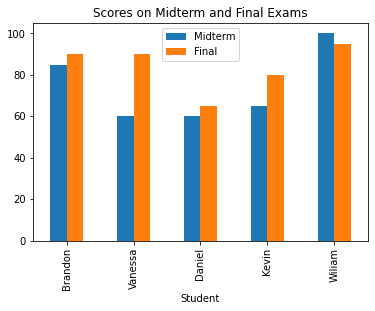

In [5]:
df.plot(kind="bar", title="Scores on Midterm and Final Exams")

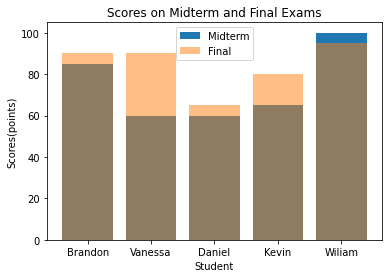

In [6]:
plt.bar(x=df.index, height=df["Midterm"])
plt.bar(x=df.index, height=df["Final"], alpha=0.5)
plt.legend(["Midterm", "Final"])
plt.title("Scores on Midterm and Final Exams")
plt.xlabel("Student")
plt.ylabel("Scores(points)")
plt.show()

In [8]:
melt_df = df.reset_index().melt(id_vars="Student", var_name="Exam", value_name="Score")
melt_df

Student     Exam  Score
0  Brandon  Midterm     85
1  Vanessa  Midterm     60
2   Daniel  Midterm     60
3    Kevin  Midterm     65
4   Wiliam  Midterm    100
5  Brandon    Final     90
6  Vanessa    Final     90
7   Daniel    Final     65
8    Kevin    Final     80
9   Wiliam    Final     95

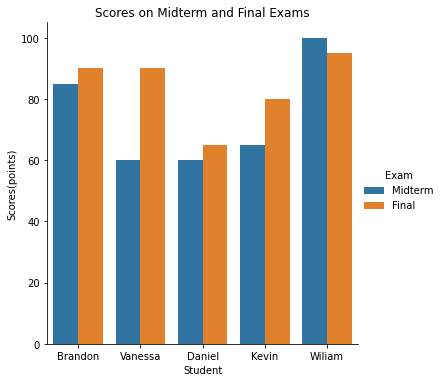

In [9]:
sns.catplot(data=melt_df, x="Student", y="Score", hue="Exam", kind="bar")
plt.title("Scores on Midterm and Final Exams")
plt.xlabel("Student")
plt.ylabel("Scores(points)")
plt.show()

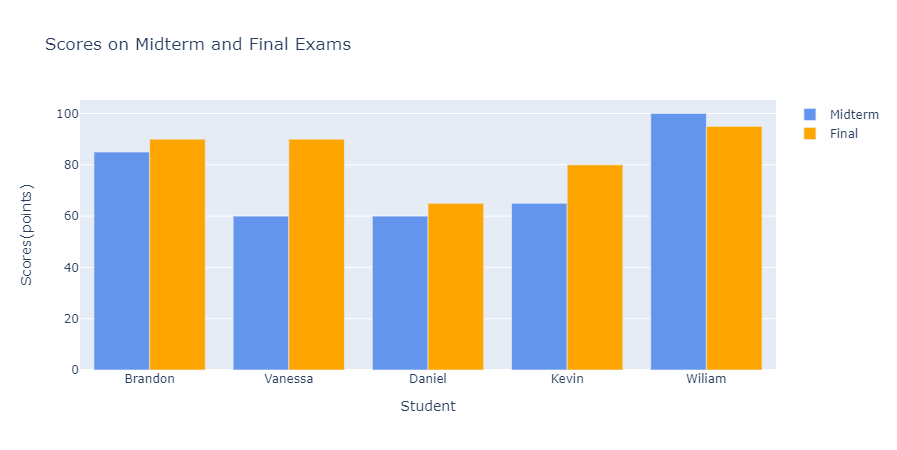

In [11]:
data = [
    go.Bar(
        x=df.index, y=df["Midterm"], name="Midterm", marker=dict(color="cornflowerblue")
    ),
    go.Bar(x=df.index, y=df["Final"], name="Final", marker=dict(color="orange")),
]
layout = go.Layout(
    title="Scores on Midterm and Final Exams",
    xaxis=dict(title="Student"),
    yaxis=dict(title="Scores(points)"),
)
fig = go.Figure(data, layout)
fig.show()